<a href="https://colab.research.google.com/github/knowl01/FoodHub-Order-Analysis/blob/main/Knowledge_Gule_FoodHub_Order_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Write your code here
df.shape

(1898, 9)

 **Observations:**

 The shape of the dataset is a tuple of 2 elements. The first element shows the number of rows which is 1898 in the data and the second element shows the number of columns which is 9 in the data.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations**:


*  There are 3 different types of data types-float64(represents numerical data with decimals), int64(represents numerical data with whole numbers) and object(represents categorical data).
*  There are 4 numerical columns with integers - delivery_time, food_preparation_time, order_id, customer_id.


*  There is only one column with numerical data containing decimals- cost_of the_order.
*   There are 4 categorical columns - restaurant_name, cuisine_type, day_of_the_week, rating.


*   The rating column is labeled as object instead of integer. This may be due to the fact that some orders are not rated.
*   All columns have 1898 values indicating that there are non null values.








### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**

  There are no missing values in all the columns.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


**Observations:**



*   The minimum, average and maximum time to prepare the food once an order is placed is 20.00, 27.37, and 35.00 minutes.






### **Question 5:** How many orders are not rated?

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

**Observations:**


*   There are 736 orders that are not rated.
*   There are 588 orders rated at 5, 386 orders rated at 4,  and 188 orders rated at 3.



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# Write the code here
df['cost_of_the_order'].nunique()

312

**Observation:**

There are 312 different costs of the orders.

In [ ]:
df['rating'].nunique()

4

**Observation:**

The ratings are divided into 4 different categories; 3,4,5 and Not given.

In [ ]:
df['day_of_the_week'].nunique()

2

**Observation:**

The days of the week have 2 unique categories, which are weekday and weekend.

In [ ]:
df['delivery_time'].nunique()

19

**Observation:**

There are 19 unique delivery times.

In [ ]:
df['restaurant_name'].nunique()

178

**Observation:**



*  There are a total of 178 different restaurant names.



In [ ]:
df['cuisine_type'].nunique()

14

**Observation:**



*  There are 14 unique cuisine types.




In [ ]:
df['customer_id'].nunique()

1200

**Observation:**


*  There are 1200 different customer IDs. Since there is 1898 unique orders, that means other customers share the same customer IDs.





In [ ]:
df['order_id'].nunique()

1898

**Observation:**



*  There are 1898 order IDs which is equal to the number of rows available thus every order is unique.




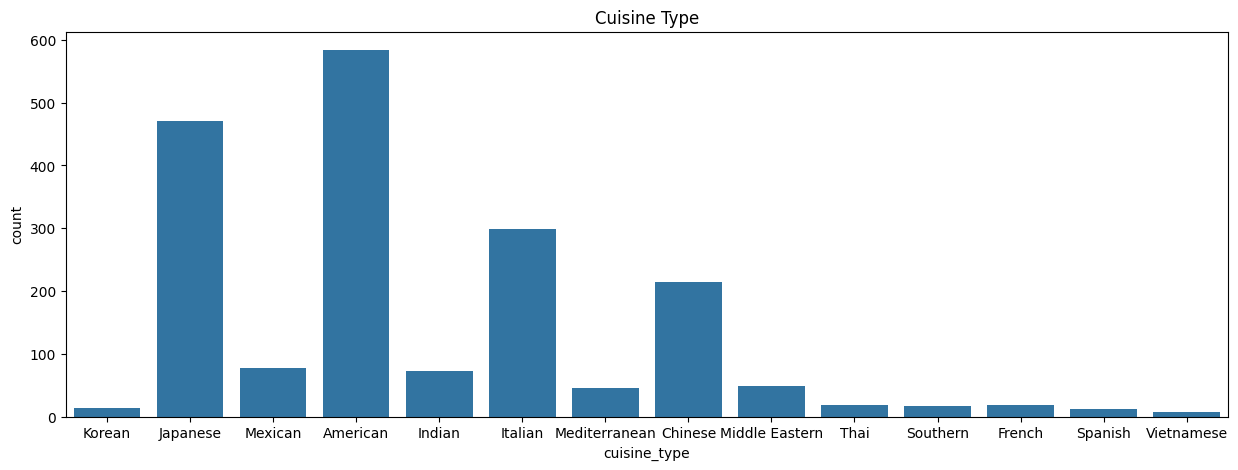

In [ ]:
#the barplot of the cuisine type
plt.figure(figsize =(15,5))
sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.title("Cuisine Type")
plt.show()

**Observations:**



*   American cuisines are the highest in numbers, followed by Japanese in all the cuisines.
*   Vietnamese cuisine are the lowest in numbers than all the cuisines.



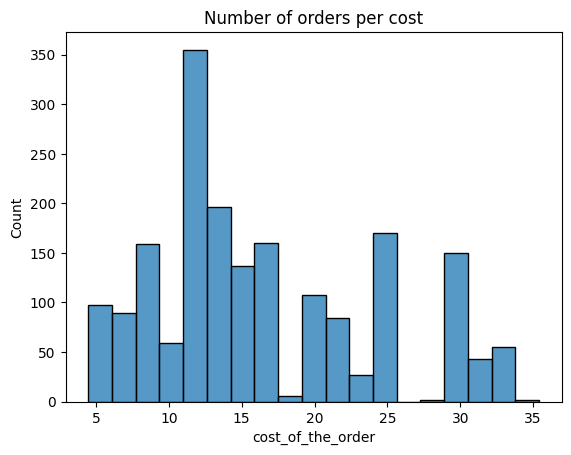

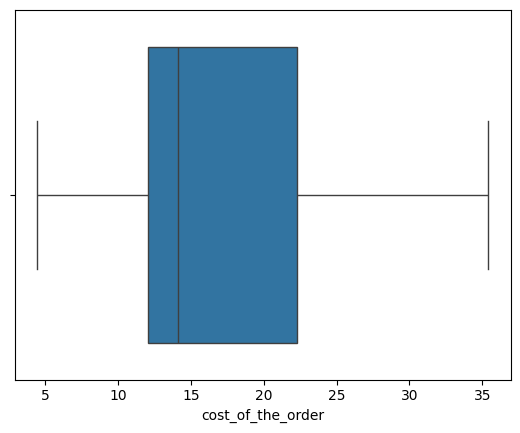

In [ ]:
sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.title("Number of orders per cost")
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order
plt.show()

In [ ]:
df['cost_of_the_order'].mean()

16.498851422550054

**Observations:**



*   The highest number of orders is ~15 dollars.
*   The maximum cost of the food is less than 36 dollars, and the minimum cost is more than 4 dollars.
*  The 25th percentile is between 10-15 dollars, same as the median at 50th percentile, the mean is a little over 15 dollars.
*  The distribution of data is right skewed indicating that more orders are made for lesser prices between 10-15 dollars.
*   There are no outliers on both sides.
* There is little to no food bought between 25-30 dollars.
*  There are very few orders made for food costing around 36 dollars.








In [ ]:
# # Check the unique values
df['day_of_the_week'].unique() ## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

<Axes: title={'center': 'Number of orders in the days of the week '}, xlabel='day_of_the_week', ylabel='count'>

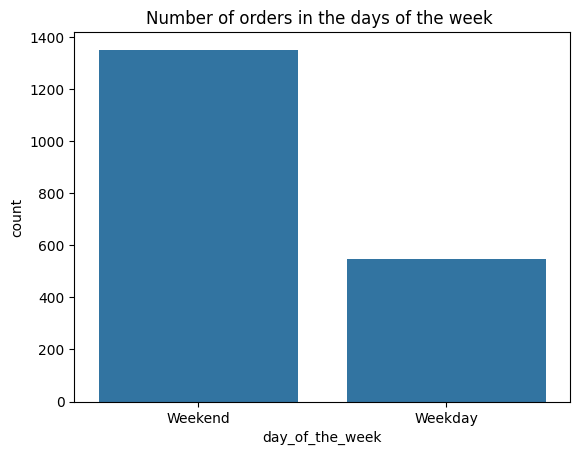

In [ ]:
plt.title("Number of orders in the days of the week ")
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column

**Observations:**



*   The orders made during the weekend is more than doubled that of orders made during the weekday.
* This may be due to the fact that on the weekend people are relaxing, going out to have fun.



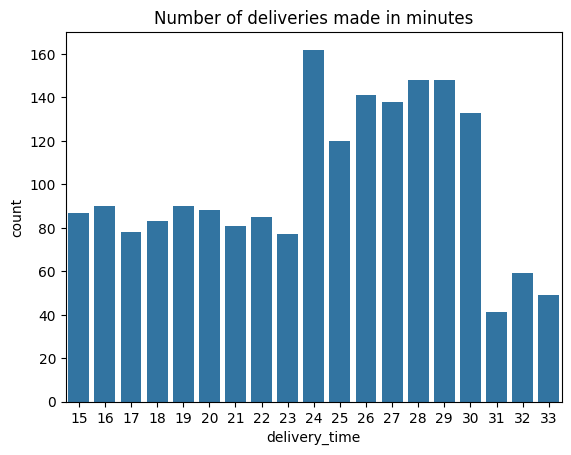

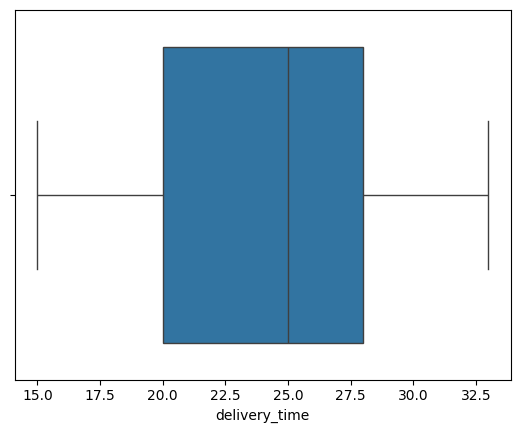

In [ ]:
plt.title("Number of deliveries made in minutes")
sns.countplot(data = df, x = 'delivery_time') ## Complete the code to plot a bar graph for 'day_of_the_week' column
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Boxplot for the cost of order
plt.show()

**Observation:**

*  Most deliveries take 24-30 minutes to deliver, with the highest being ~24 minutes.
*  The median delivery time is 25 minutes while the mean is 24.16 minutes.
*  There are no outliers.


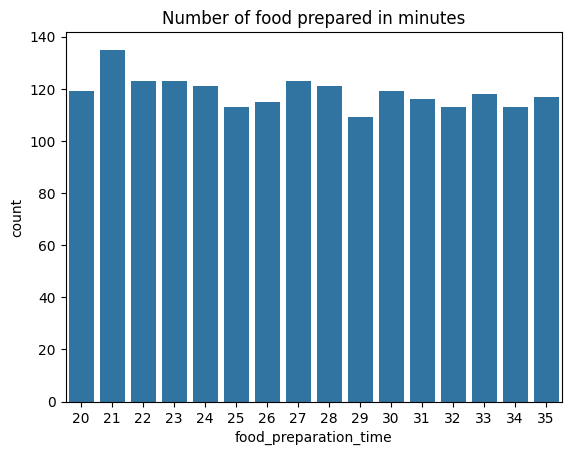

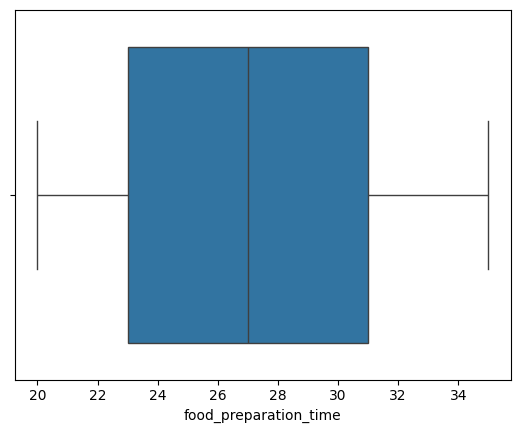

In [ ]:
plt.title("Number of food prepared in minutes")
sns.countplot(data = df, x = 'food_preparation_time') ## Complete the code to plot a bar graph for 'day_of_the_week' column
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Boxplot for the cost of order
plt.show()

**Observation:**

*  The median preparation time is 27 minutes which is almost the same as the mean which is 27.37 minutes.
*  There are no outliers.
*   The number of food prepared for each time is uniformly distributed throughout the whole distribution.

In [ ]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

<Axes: title={'center': 'Number of ratings'}, xlabel='rating', ylabel='count'>

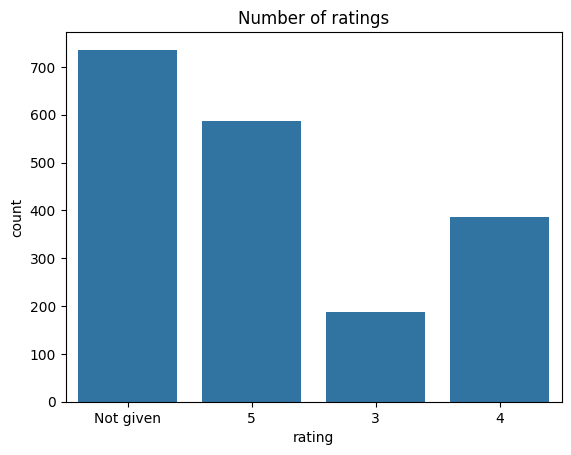

In [ ]:
plt.title("Number of ratings")
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

**Observations:**



*   The highest number of orders are not rated.
*   The highest rating of the food is rated at 5.  
*   There is no 2 or 1 rating in the data, which shows that customers are satisfied with the food.



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
df['restaurant_name'].unique()

array(['Hangawi', 'Blue Ribbon Sushi Izakaya', 'Cafe Habana',
       'Blue Ribbon Fried Chicken', 'Dirty Bird to Go',
       'Tamarind TriBeCa', 'The Meatball Shop', 'Barbounia',
       'Anjappar Chettinad', 'Bukhara Grill',
       'Big Wong Restaurant \x8c_¤¾Ñ¼', 'Empanada Mama (closed)', 'Pylos',
       "Lucky's Famous Burgers", 'Shake Shack', 'Sushi of Gari',
       'RedFarm Hudson', 'Blue Ribbon Sushi',
       'Five Guys Burgers and Fries', 'Tortaria', 'Cafe Mogador',
       'Otto Enoteca Pizzeria', 'Vezzo Thin Crust Pizza',
       'Sushi of Gari 46', 'The Kati Roll Company', 'Klong',
       '5 Napkin Burger', 'TAO', 'Parm', 'Sushi Samba',
       'Haru Gramercy Park', 'Chipotle Mexican Grill $1.99 Delivery',
       'RedFarm Broadway', 'Cafeteria', 'DuMont Burger',
       "Sarabeth's East", 'Hill Country Fried Chicken', 'Bistango',
       "Jack's Wife Freda", "Mamoun's Falafel", 'Prosperity Dumpling',
       'Blue Ribbon Sushi Bar & Grill', 'Westville Hudson',
       'Blue Ribbon Br

In [ ]:
# Write the code here
#top=df.loc[df['cost_of_the_order'].value_counts()]
df['restaurant_name'].value_counts().head()


Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations:**



*  The above data shows the top 5 restaurant with Shake Shack having the highest orders at 219 and Parm having the lowest orders at 68.  




### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
popular=df[df['day_of_the_week']=='Weekend']
#pop1=df.loc[popular['cost_of_the_order'].value_counts()]
popular['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

**Observation:**

*  The American cuisine is the most popular on weekends at 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
df[df['cost_of_the_order']>20]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17
17,1477373,139885,Blue Ribbon Sushi Izakaya,Japanese,33.03,Weekend,Not given,21,22
...,...,...,...,...,...,...,...,...,...
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17


In [ ]:
df_cost =df[df['cost_of_the_order']>20]
df1 = df_cost.value_counts().sum()
percent = df1/df.shape[0]*100
print('The percentage of orders costing more than 20 dollars is', round(percent,2),'%')

The percentage of orders costing more than 20 dollars is 29.24 %


**Observations:**
*   The percentage of the orders costing more than  20 dollars is 29.24%.
*   This aligns with the observation since the more the orders cost, the less number of orders were made.

### **Question 10**: What is the mean order delivery time?

In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

**Observations:**

*   The mean delivery time is 24.16 minutes.



### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
dmm = df.loc[((df['delivery_time']) &(df['order_id'])).value_counts()]
dmm


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
309,1478221,47280,Rubirosa,Italian,12.56,Weekend,4,31,17
265,1476579,85633,The Meatball Shop,Italian,24.20,Weekend,5,24,24
132,1477287,111125,Otto Enoteca Pizzeria,Italian,14.99,Weekend,Not given,29,21
127,1477405,128243,The Meatball Shop,Italian,6.74,Weekend,5,26,30
93,1476635,86731,Mission Cantina,Mexican,16.20,Weekend,5,31,18
92,1478211,154030,RedFarm Hudson,Chinese,33.03,Weekend,4,26,22
84,1478423,129969,The Meatball Shop,Italian,21.20,Weekend,Not given,34,16
83,1477385,67538,Chipotle Mexican Grill $1.99 Delivery,Mexican,12.56,Weekend,5,22,18
82,1477790,133617,Shake Shack,American,4.75,Weekday,4,35,28
74,1477821,277898,Haandi,Indian,5.67,Weekday,4,23,31


**Observations:**
* In this observation, an assumption that the a customer will be staying in the same place, hence the same delivery time is made.

*  The top 3 most frequent customers:

1. order_id: 1478221, customer_id: 47280, number of orders made: 309

2. order_id: 1476579, customer_id: 85633 , number of orders made: 265

3. order_id: 1477287 , customer_id: 111125, number of orders made: 132

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

<ipython-input-181-945da2ee22f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')#visualizing the two


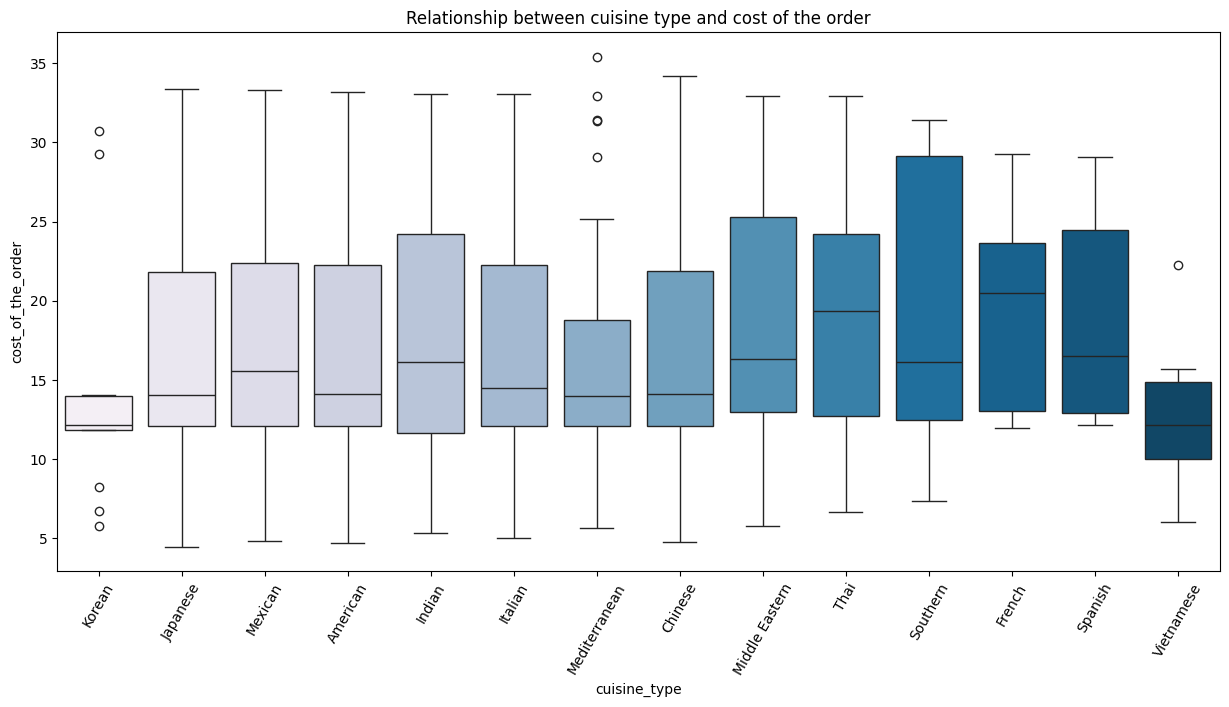

In [ ]:
# Write the code here
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')#visualizing the two
plt.xticks(rotation = 60)
plt.title("Relationship between cuisine type and cost of the order")
plt.show()

**Observations:**

* There are 3 cuisines with outliers; Korean on both sides, Vietnamese and Mediterranean on one side.
*  The French cuisine has the highest median cost and Vietnamese has the lowest median cost.
*  Costs for Southern cuisine have the highest interquartile range compared to all the others.
* Korean cuisine has the smallest interquartile range of costs.

<ipython-input-182-d02da6fb8057>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot


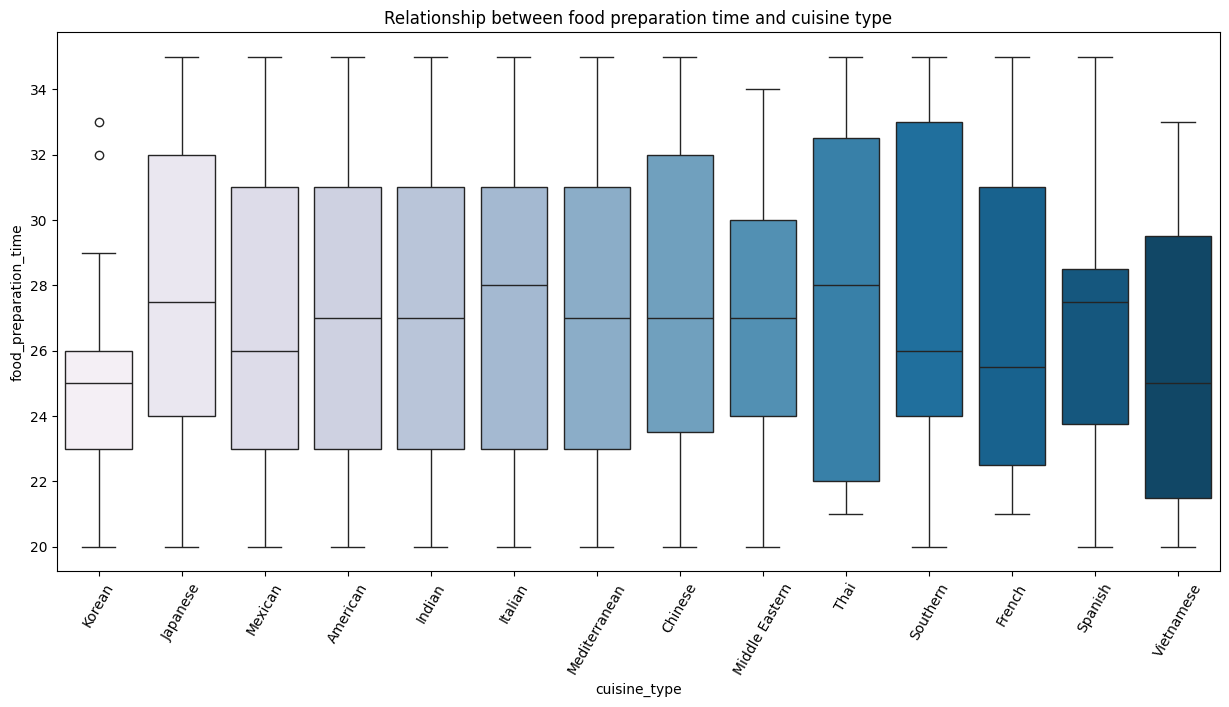

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.title("Relationship between food preparation time and cuisine type")
plt.show()

**Observations:**

*   The American, Indian, Mediterranean, Chinese and Middle Eastern cuisines have the same median time which is around 27 minutes.
*   Only the Korean cuisine has outlier on one side, which means some food might take longer to prepare and also has the lowest median preparation time.
*  The interquartile range for the preparation time is uniformly distributed for many cuisines.
*  Thai cuisine has the highest interquartile range.  


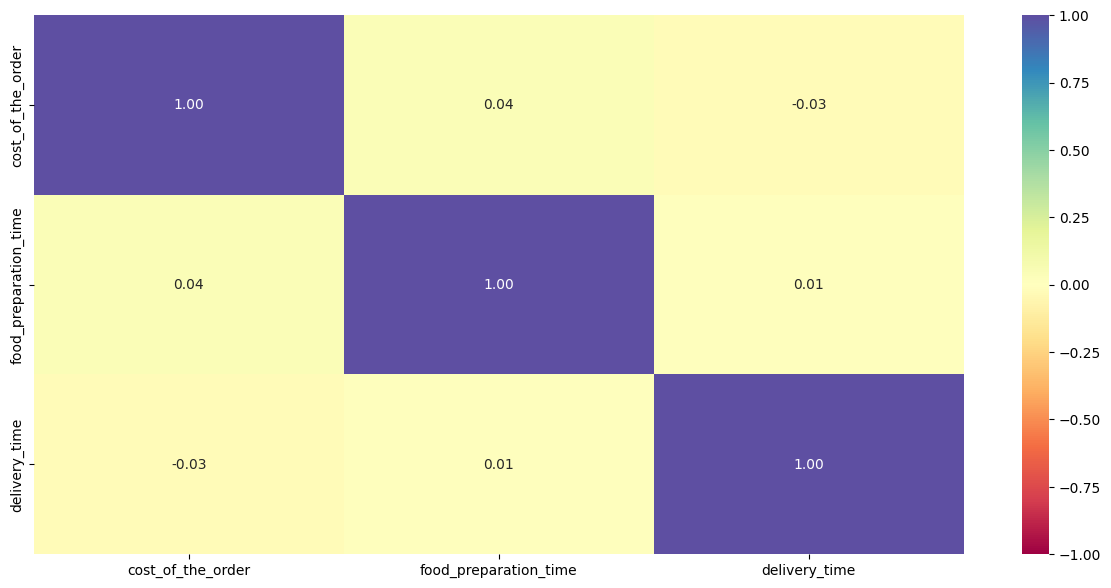

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
#The correlation betwen cost of the order, food preparation time, delivery time
plt.show()

**Observations:**
*  The food preparation time and the cost of the order is positively correlated as expected.
*   The cost of the order and the delivery time are negatively correlated which makes sense.
* The food preparation time is positively correlated with delivery time.


<ipython-input-184-d5a7d81bf8d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='rating', y='food_preparation_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot


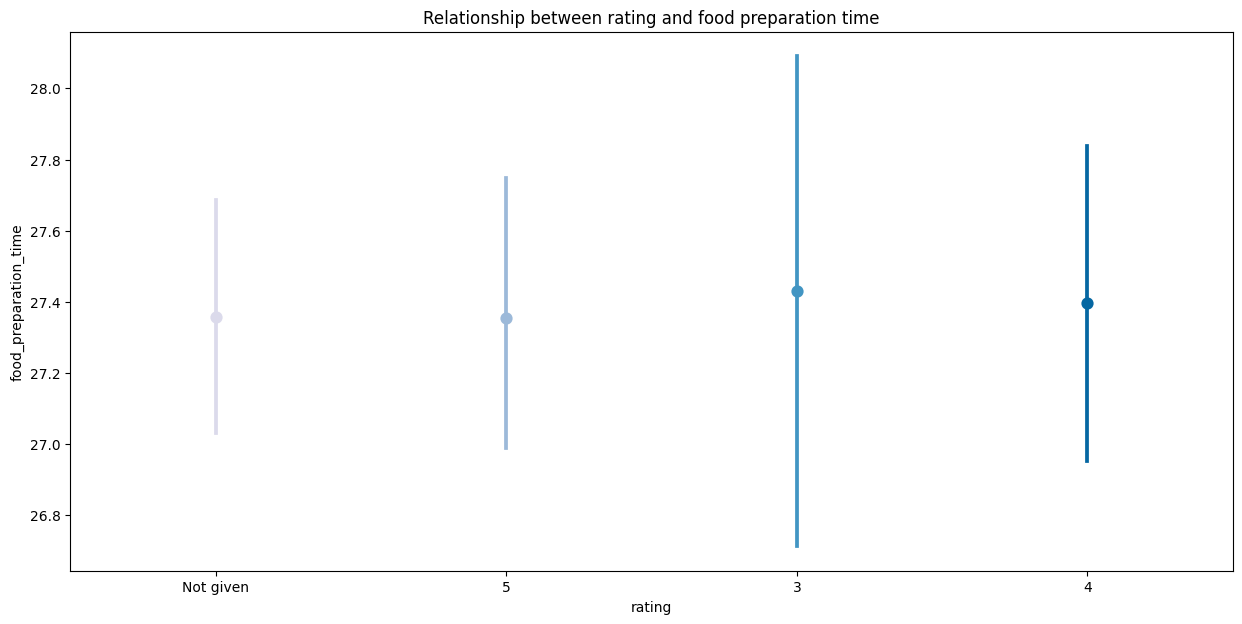

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='food_preparation_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.title("Relationship between rating and food preparation time")
plt.show()

**Observation:**

*  Food rated at 3 has the highest range for preparation time with the highest median time ~27.5 minutes.
The median preparation time is uniform in all the distribution.

<ipython-input-185-3ec1dd78b5a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.pointplot(x='rating', y='cost_of_the_order', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between rating and cost of the order using pointplot


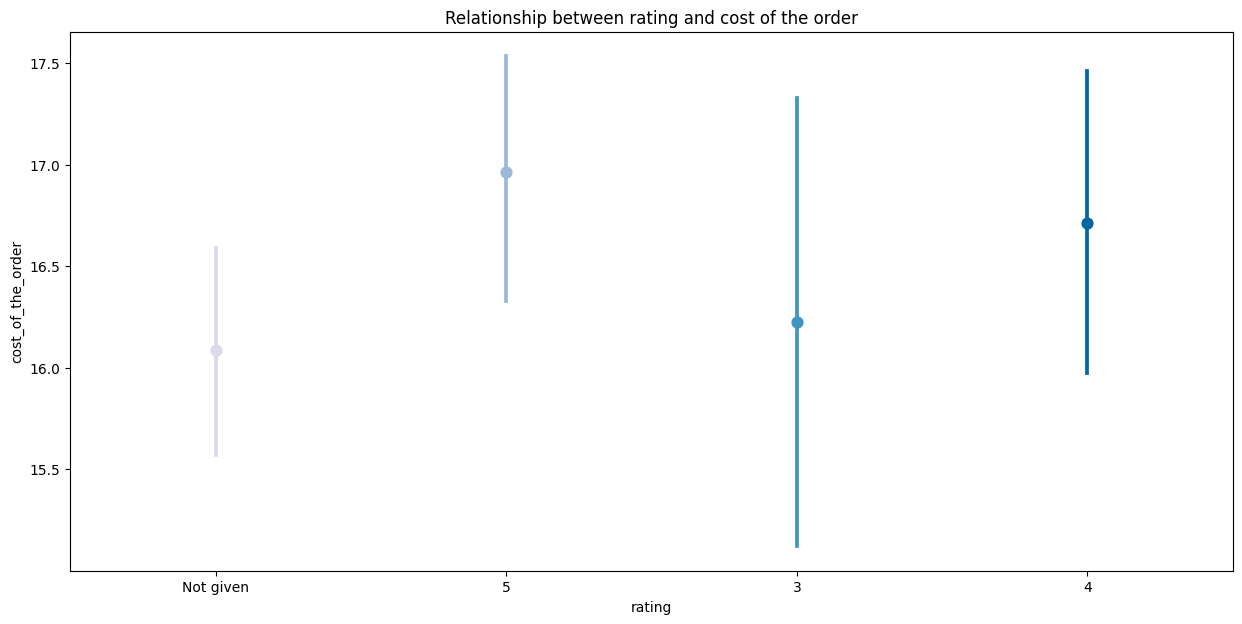

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x='rating', y='cost_of_the_order', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.title("Relationship between rating and cost of the order")
plt.show()

**Observations:**

*  Food rated at 5 has the highest of costs and the highest median.
*  Food not given ratings has the lowest range.
* Food rated at 3 has a large range of costs than all the others.
*  The higher the rating, the higher the cost of the order.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Write the code here

# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
df_rating_count[df_rating_count['rating']>50]#['restaurant_name']

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating']>50]['restaurant_name'] ## Complete the code to get the restaurant names having rating count more than 50

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### **Observations:**
  

*   There are 4 restaurants with more than 50 ratings.
*   The restaurant with the highest number of ratings is Shake Shack at 133 and the lowest is Blue Ribbon Fried Chicken at 64.
*   The restaurant with the highest average rating is The Meatball Shop at 4.5 and the lowest is Blue Ribbon Sushi at 4.2.





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# Write the code here
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
R1 = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)
R1

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

In [ ]:
df['Revenue'].sum()

6166.303

**Observations**:
 *    The company made a total net revenue of 6166.30 dollars across all orders.

*  The restaurants having the highest number of orders have the highest revenue in the descending order.  

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Write the code here
df['Prep_time'] =df['food_preparation_time'] + df['delivery_time']
dff = df[df['Prep_time']>60]
dff

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Prep_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.0955,62


In [ ]:
peercent = ((dff['Prep_time'].shape[0])/df.shape[0])*100
print('The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is ',round(peercent,2),'%', sep='')

The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 10.54%


In [ ]:
dff['Prep_time'].shape

(200,)

#### **Observations:**


*   There are 200 orders that take more than 60 minutes to deliver after order is made.
*   These orders make a total of 10.54%.



### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
(df['day_of_the_week']=='Weekday').sum()


547

In [ ]:
m1 = df.loc[(df['delivery_time'])&(df['day_of_the_week']=='Weekday')]
m1

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Prep_time
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
25,1476693,41877,Cafe Mogador,Middle Eastern,29.10,Weekday,5,20,29,7.2750,49
26,1476995,371590,The Meatball Shop,Italian,21.88,Weekday,5,24,27,5.4700,51
29,1476889,149984,Sushi of Gari 46,Japanese,12.18,Weekday,Not given,20,29,1.8270,49
36,1478017,148649,Blue Ribbon Sushi,Japanese,16.01,Weekday,4,23,31,2.4015,54
...,...,...,...,...,...,...,...,...,...,...,...
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,1.8345,65
1876,1478320,85091,The Meatball Shop,Italian,13.53,Weekday,3,20,31,2.0295,51
1878,1477194,62540,Blue Ribbon Sushi,Japanese,5.92,Weekday,Not given,27,31,0.8880,58
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,7.2625,56


In [ ]:
(df['day_of_the_week']=='Weekend').sum()

1351

In [ ]:
m2 = df.loc[(df['delivery_time'])&(df['day_of_the_week']=='Weekend')]
m2

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Prep_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.9105,49
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,6.0750,40
13,1477449,104548,Pylos,Mediterranean,11.30,Weekend,3,24,23,1.6950,47
...,...,...,...,...,...,...,...,...,...,...,...
1883,1476748,109906,The Meatball Shop,American,9.27,Weekend,Not given,24,23,1.3905,47
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,2.1750,59
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21,7.2875,50
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.5775,48


<ipython-input-199-3e62769eb0d1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot


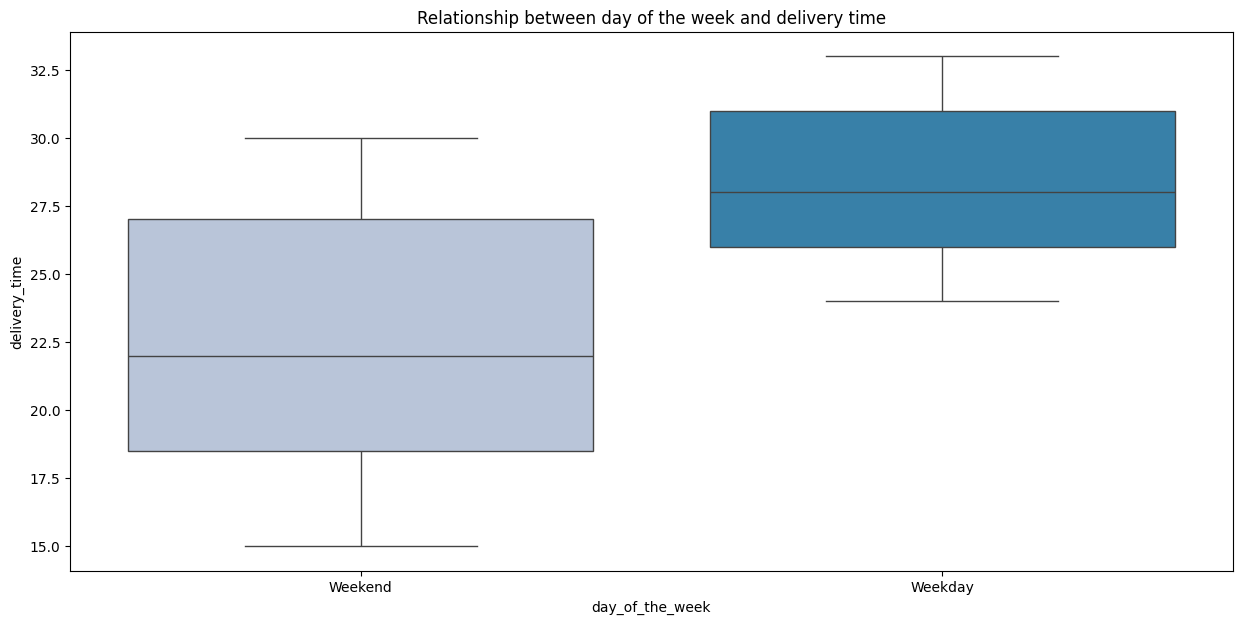

In [ ]:
# Write the code here
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, palette='PuBu')  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.title("Relationship between day of the week and delivery time")
plt.show()

**Observations:**

*    The mean delivery time on the weekend is smaller ~(22 minutes) than on the weekday ~(28 minutes).
*   More food is delivered on the weekend compared to the weekday.
*   This may be due to having more drivers to deliver food on the weekend compared to weekday.




### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

**Conclusions:**

We have analyzed the dataset for 1898 orders with orders costing between 4-36 dollars. The main feature is the cost of the order and rating.
*   The Thai, French, Southern, Vietnamese, Spanish cuisines have the lowest orders.
*  The higher the rating the higher the cost of the order.    
*  There are more orders on the weekend than on weekday which means people prefer to relax on weekends.
*  Delivery time is shorter during the weekend than on the weekday.
*   Restaurants with the highest orders generate the highest revenue.
*  The Mediterranean, Korean and Vietnamese cuisines have outliers for the cost of the orders.
*  There are more American cuisines followed by Japanese cuisines, Vietnamese cuisines are very few.

**Recommendations:**

*  The Korean, Vietnamese and Mediterranean cuisines to reduce the costs for the food with the highest costs or replace it with food that costs less since they are not getting as many orders throughout the whole week.

*  Since the highest orders are on the weekend, food availability must be ensured, same as drivers.

* Procure more data on cost of food and build a model that can predict optimal pricing.
*  American, Japanese, Italian, Chinese cuisines generate the most revenue, they can increase the prices of their orders to generate more revenue in the future as customers are satisfied with the food as we saw that the ratings were higher for orders that costed more.

---

> Indented block

